# Projeto Ciência de Dados - Previsão de Vendas

Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa "Hashtag" investe: TV, Jornal e Rádio

### Passo a Passo

- Passo 01: Ask - Entendimento do Desafio/Entendimento da Área/Empresa;
- Passo 02: Prepare - Extração/Obtenção de Dados;
- Passo 03: Process - Tratamento/Limpeza dos Dados (Data cleansing);
- Passo 04: Analyse - Análise Exploratória (EDA);
- Passo 05: Share - Plotagem das previsões;
- Passo 06: Act - Interpretação de Resultados.

### Passo 01 - Ask:

Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa "Hashtag" investe: TV, Jornal e Rádio;

* TV, Jornal e Rádio estão em milhares de reais;
* Vendas estão em milhões.

### Passo 02: Prepare:

In [12]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [6]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
df_ads = pd.read_csv("/content/DataSet_Advertising.csv")
display(df_ads)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Nesse exemplo de projeto, a df_ads já foi limpa e está pronta para análise, então o passo 03 - process já foi realizado!

### Passo 04 - Analyse: 

- Tentar visualizar como as informações de cada item estão distribuídas;
- Achar a correlação entre cada um dos itens.

In [11]:
# Observar a correlação dos dados:
df_ads.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


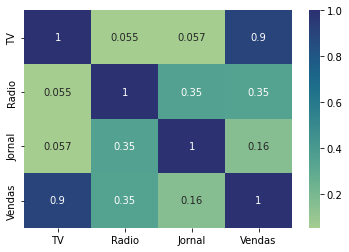

In [14]:
sns.heatmap(df_ads.corr(), annot=True, cmap="crest")
plt.show()

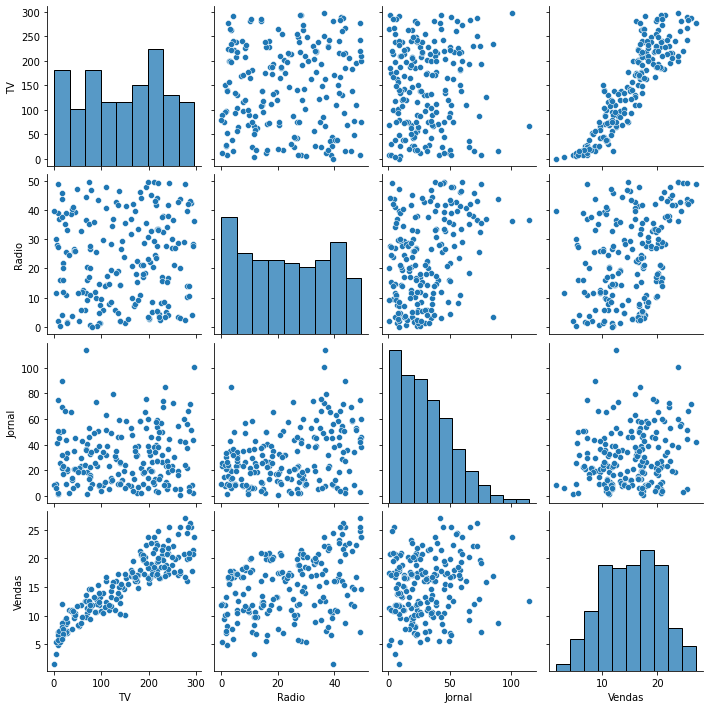

In [16]:
sns.pairplot(df_ads)
plt.show()

In [17]:
# Separar os dados para treino e para teste:
y = df_ads["Vendas"]    # Quem queremos prever, nesse caso "Vendas".
x = df_ads.drop("Vendas", axis=1)   # Quem iremos usar para treinar, no caso, o resto da tebela.

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [19]:
# Criar os modelos:
modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

# treinar os modelos::
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [20]:
# R² (Coeficiente de determinação) do nosso modelo:
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaoLinear))
print(metrics.r2_score(y_teste, previsao_arvoreDecisao))  

0.9071151423684272
0.9648408512989157


### Passo 05: Share:

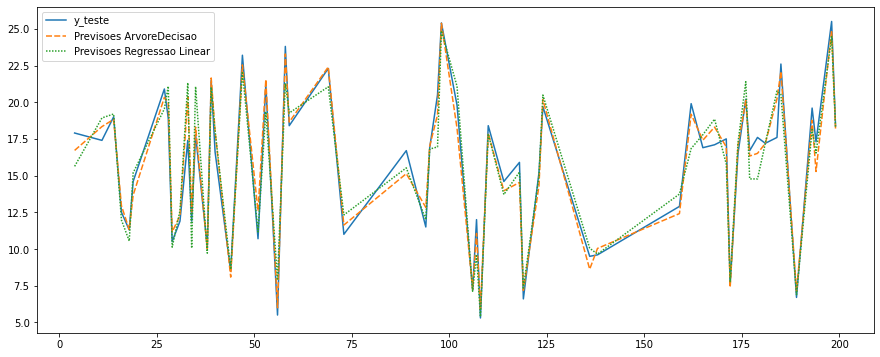

In [21]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoreDecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaoLinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [23]:
# Nova previsão com os dados da DataSet_novos:
df_novos = pd.read_csv("/content/DataSet_novos.csv")
display(df_novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [26]:
previsao = modelo_arvoredecisao.predict(df_novos)
print(previsao)

[ 7.74   8.642 19.888]


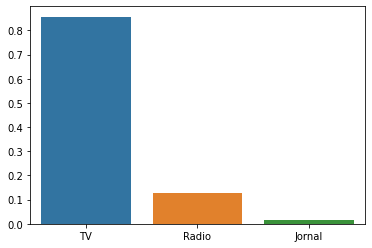

In [27]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

In [29]:
# Comparar Radio com Jornal
print(df_novos[["Radio", "Jornal"]].sum())

Radio     49.7
Jornal    74.3
dtype: float64


# Notebook do Marcos - (づ｡◕‿‿◕｡)づ (ﾉ◕ヮ◕)ﾉ ヽ(^◇^*)/